In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from config_management import UnifiedConfiguration
import data_management
import plot

config = UnifiedConfiguration()

In [2]:
ec_for_naics = data_management.read_targets(config.path['target_dir'])
sorted_naics_levels = config.cehd['naics_levels']
ec_for_naics = {k : ec_for_naics[k] for k in sorted_naics_levels}

opera_features = pd.read_parquet(config.path['opera_features_file'])

In [39]:
correlation_features.corr()

KOA_pred   VP_pred   HL_pred    P_pred   WS_pred  MolWeight  \
KOA_pred          1.000000 -0.825001 -0.500074  0.340840 -0.535916   0.745217   
VP_pred          -0.825001  1.000000  0.594550 -0.105874  0.391207  -0.625031   
HL_pred          -0.500074  0.594550  1.000000  0.279447 -0.093457  -0.244245   
P_pred            0.340840 -0.105874  0.279447  1.000000 -0.698900   0.439703   
WS_pred          -0.535916  0.391207 -0.093457 -0.698900  1.000000  -0.663613   
MolWeight         0.745217 -0.625031 -0.244245  0.439703 -0.663613   1.000000   
TopoPolSurfAir    0.319746 -0.498018 -0.583297 -0.350415  0.063479   0.458830   
nbRotBd_discrete  0.340080 -0.185394 -0.043333  0.285246 -0.317420   0.580362   

                  TopoPolSurfAir  nbRotBd_discrete  
KOA_pred                0.319746          0.340080  
VP_pred                -0.498018         -0.185394  
HL_pred                -0.583297         -0.043333  
P_pred                 -0.350415          0.285246  
WS_pred                 0.063479         -0.317420  
MolWeight               0.458830          0.580362  
TopoPolSurfAir          1.000000          0.414287  
nbRotBd_discrete        0.414287          1.000000

In [38]:
correlation_features.isna().sum() / len(correlation_features)

KOA_pred            0.216964
VP_pred             0.047719
HL_pred             0.143706
P_pred              0.042008
WS_pred             0.028412
MolWeight           0.000000
TopoPolSurfAir      0.000107
nbRotBd_discrete    0.000000
dtype: float64

In [43]:
ec_for_naics['sector']

DTXSID          naics_id
DTXSID0020151   32           0.074324
                33          10.882086
DTXSID0020153   32          28.086929
                33           1.022417
                44           4.727942
                              ...    
DTXSID9051660   23           0.002283
                33           0.026712
                81           0.005365
DTXSID9058789   33           0.015297
DTXSID90893948  33           0.225231
Name: mg_per_m3, Length: 3069, dtype: float64

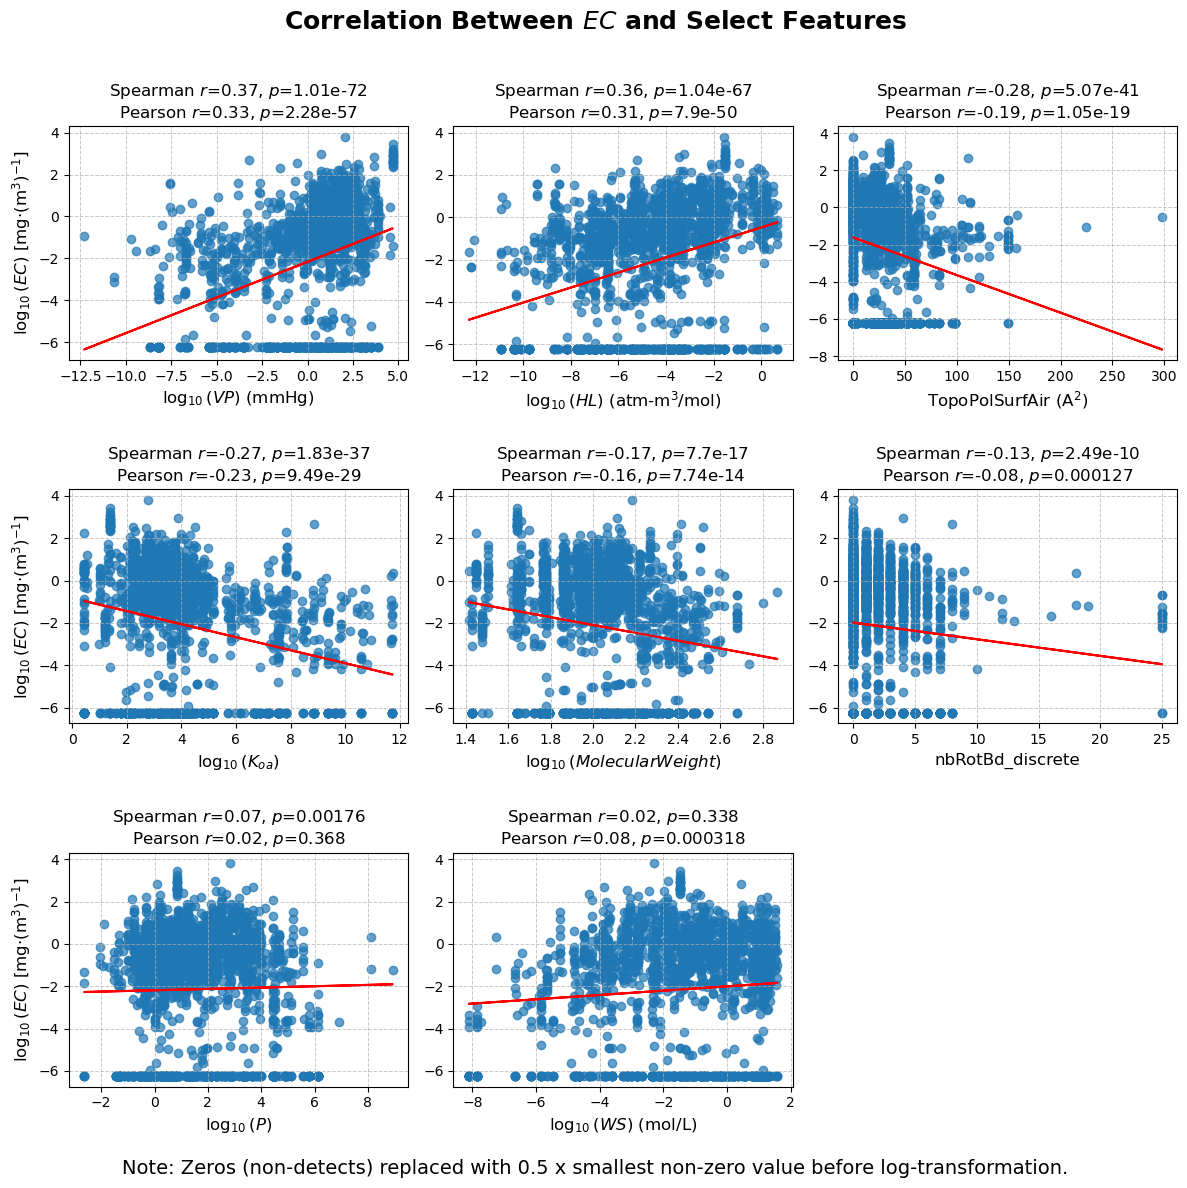

In [3]:
correlation_features = pd.DataFrame({
    'KOA_pred': np.log10(opera_features['KOA_pred']),
    'VP_pred': np.log10(opera_features['VP_pred']),
    'HL_pred': np.log10(opera_features['HL_pred']),
    'P_pred': np.log10(opera_features['P_pred']),
    'WS_pred': np.log10(opera_features['WS_pred']),
    'MolWeight': np.log10(opera_features['MolWeight']),
    'TopoPolSurfAir': opera_features['TopoPolSurfAir'],
    'nbRotBd_discrete': opera_features['nbRotBd_discrete']
})

label_for_feature = {
    'KOA_pred': r'$\log_{10}(K_{oa})$',
    'VP_pred': r'$\log_{10}(VP)$ (mmHg)',
    'HL_pred': r'$\log_{10}(HL)$ (atm-m$^3$/mol)',
    'P_pred': r'$\log_{10}(P)$',
    'WS_pred': r'$\log_{10}(WS)$ (mol/L)',
    'MolWeight': r'$\log_{10}(Molecular Weight)$',
    'TopoPolSurfAir': r'TopoPolSurfAir (A$^2$)',
    'nbRotBd_discrete': r'nbRotBd_discrete'
}

plot.correlation_by_feature(
    ec_for_naics['sector'],
    correlation_features.rename(label_for_feature, axis=1),
    suptitle='Correlation Between $\mathit{EC}$ and Select Features',
    write_path='figures/correlation_by_feature.png'
)

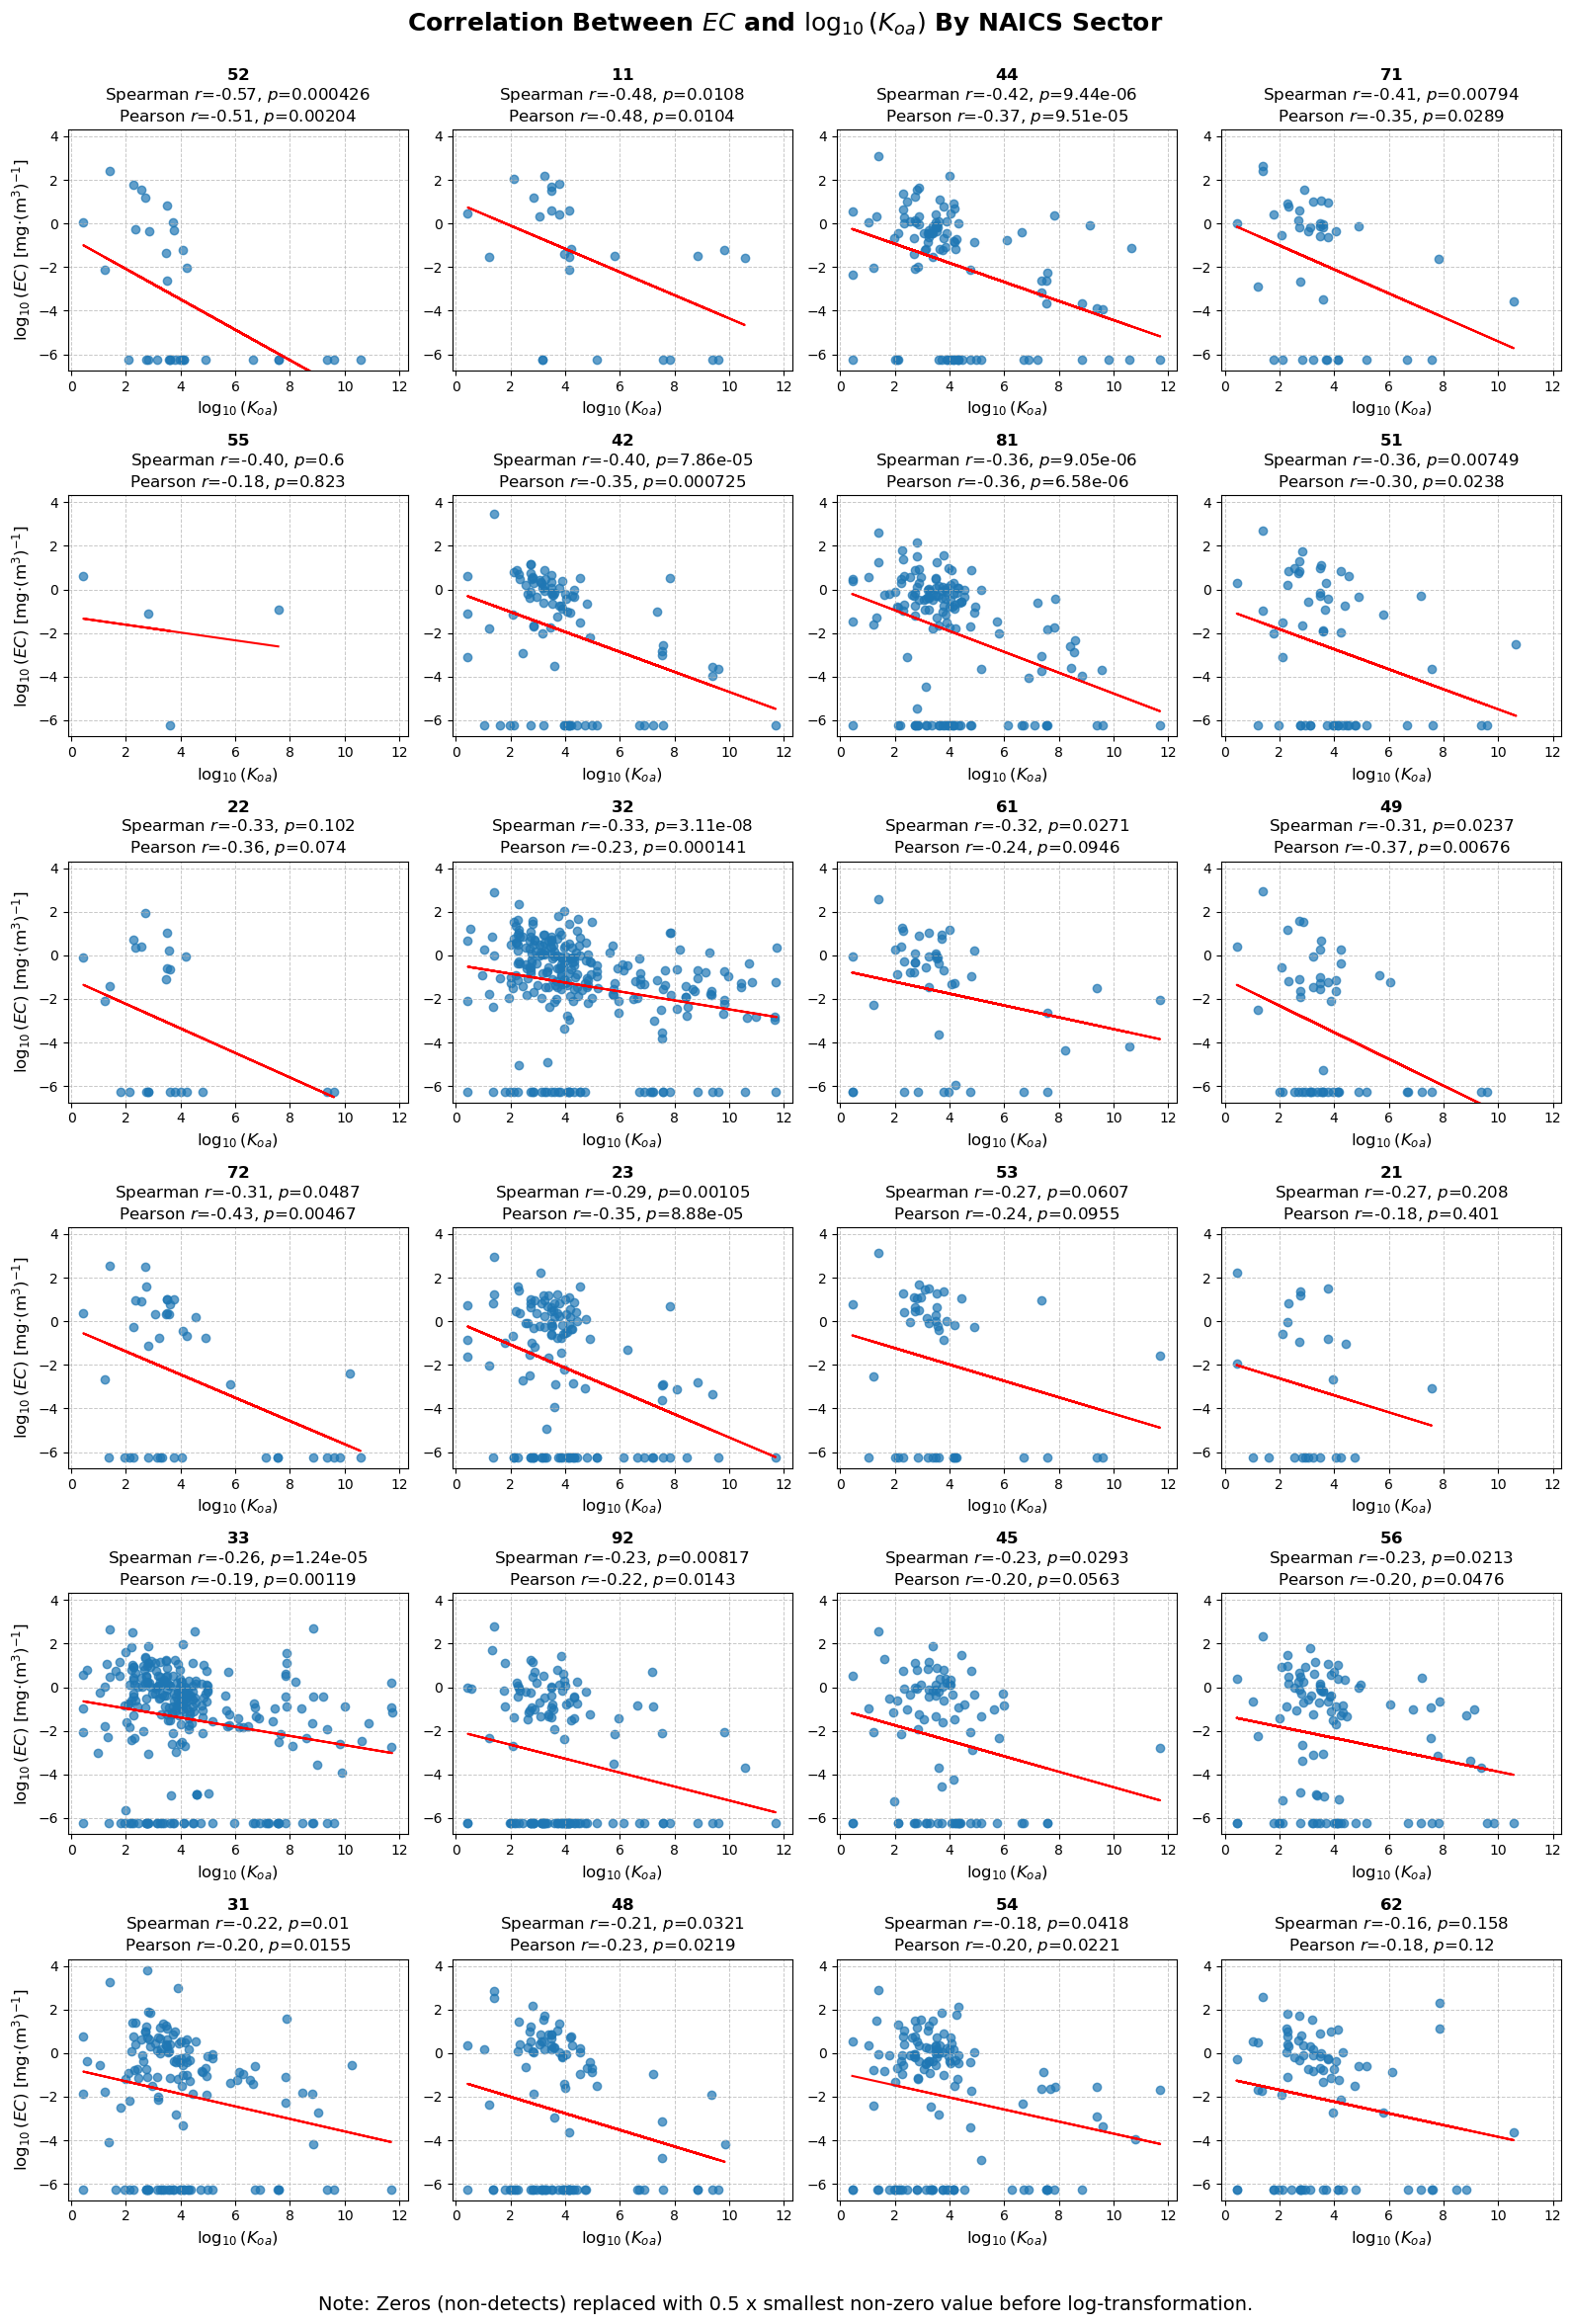

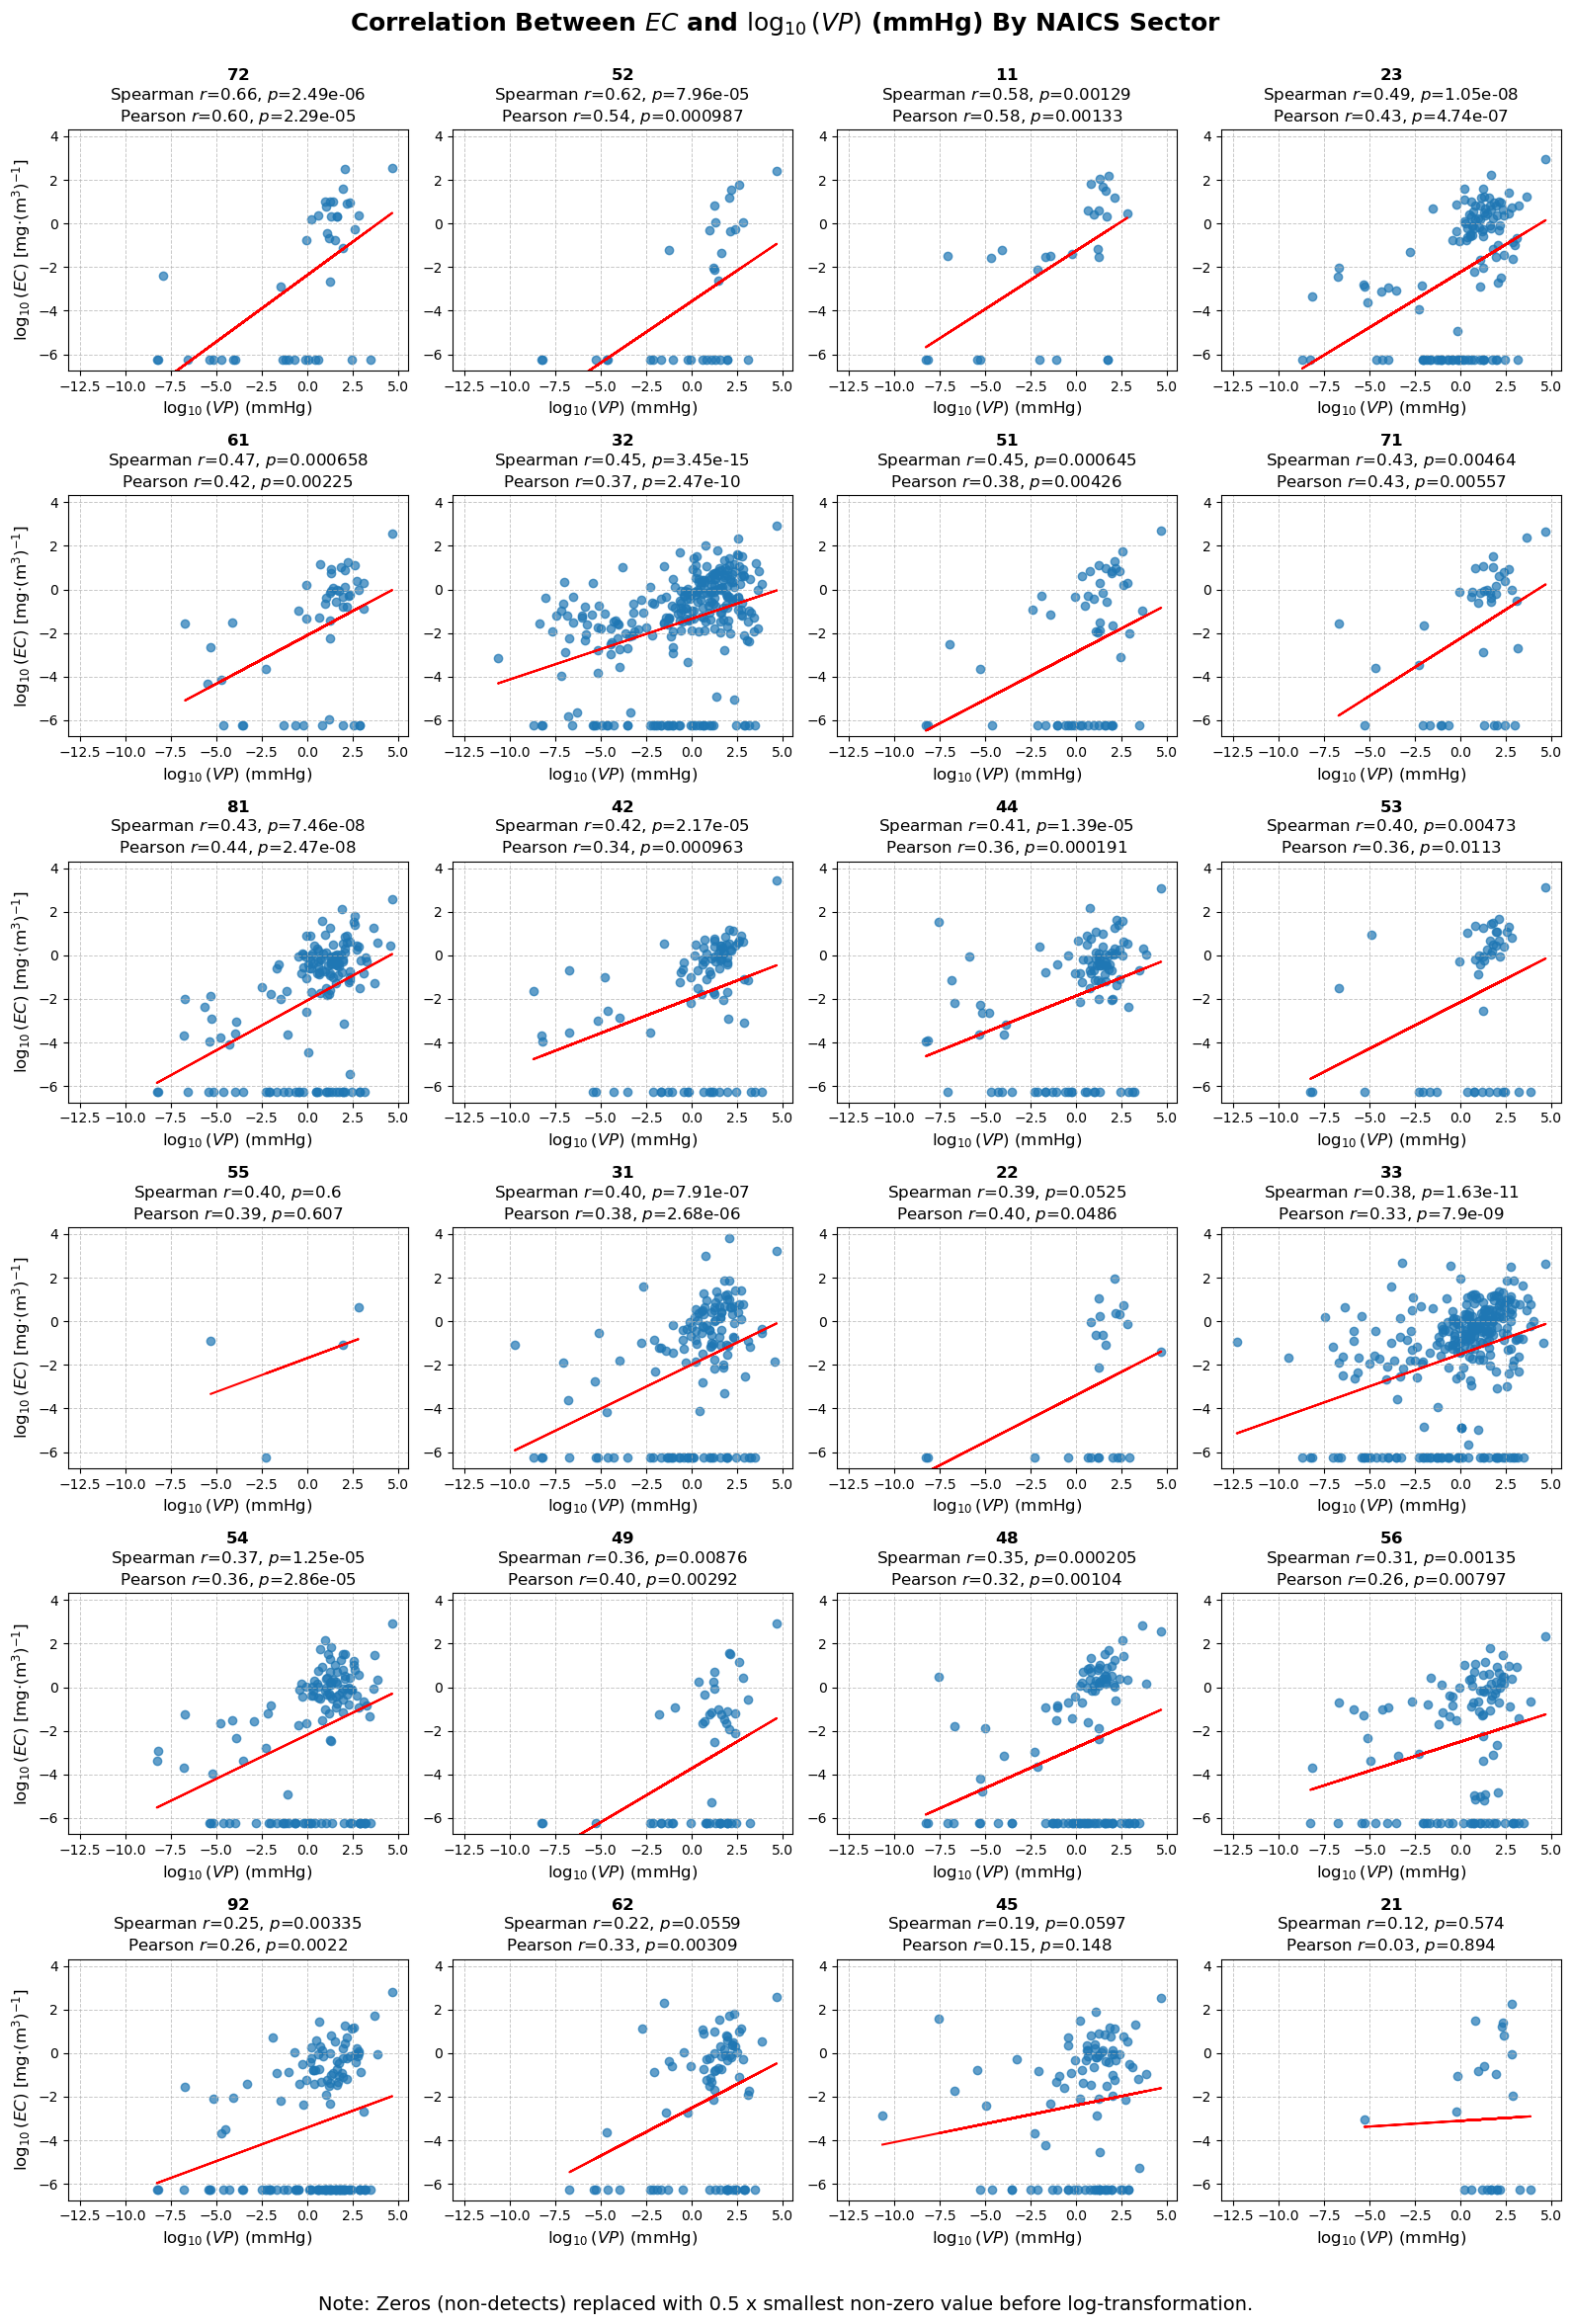

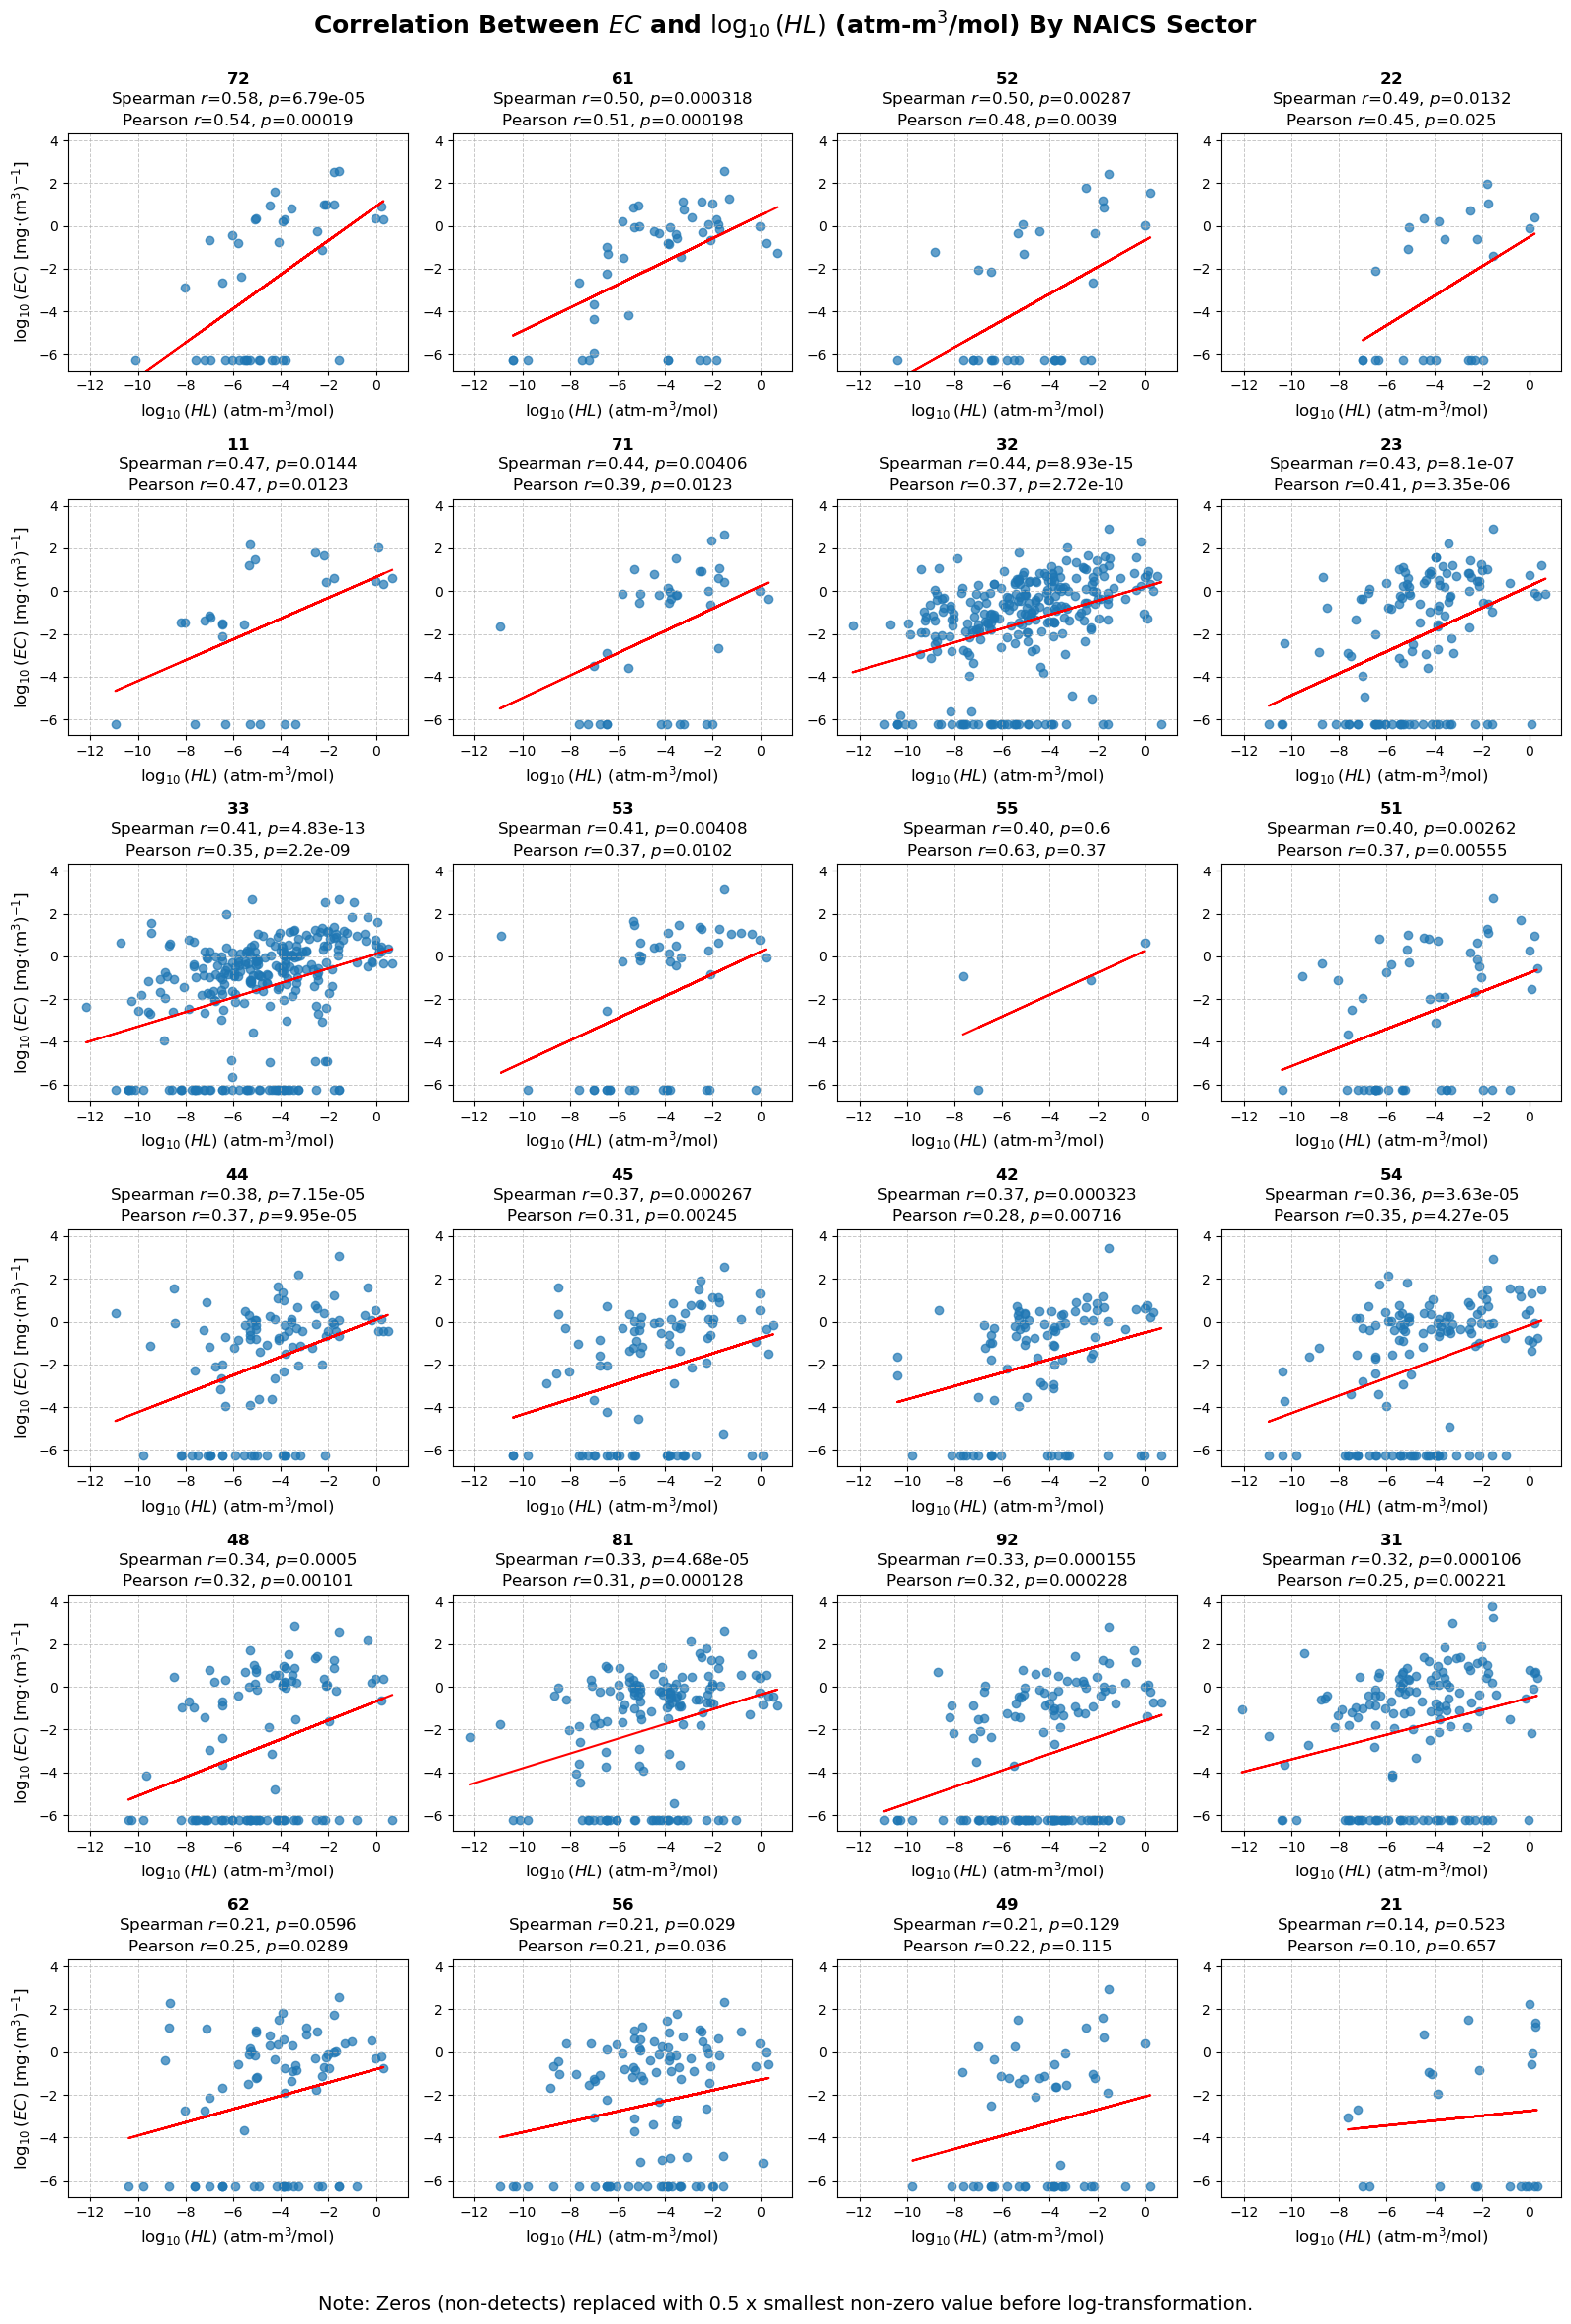

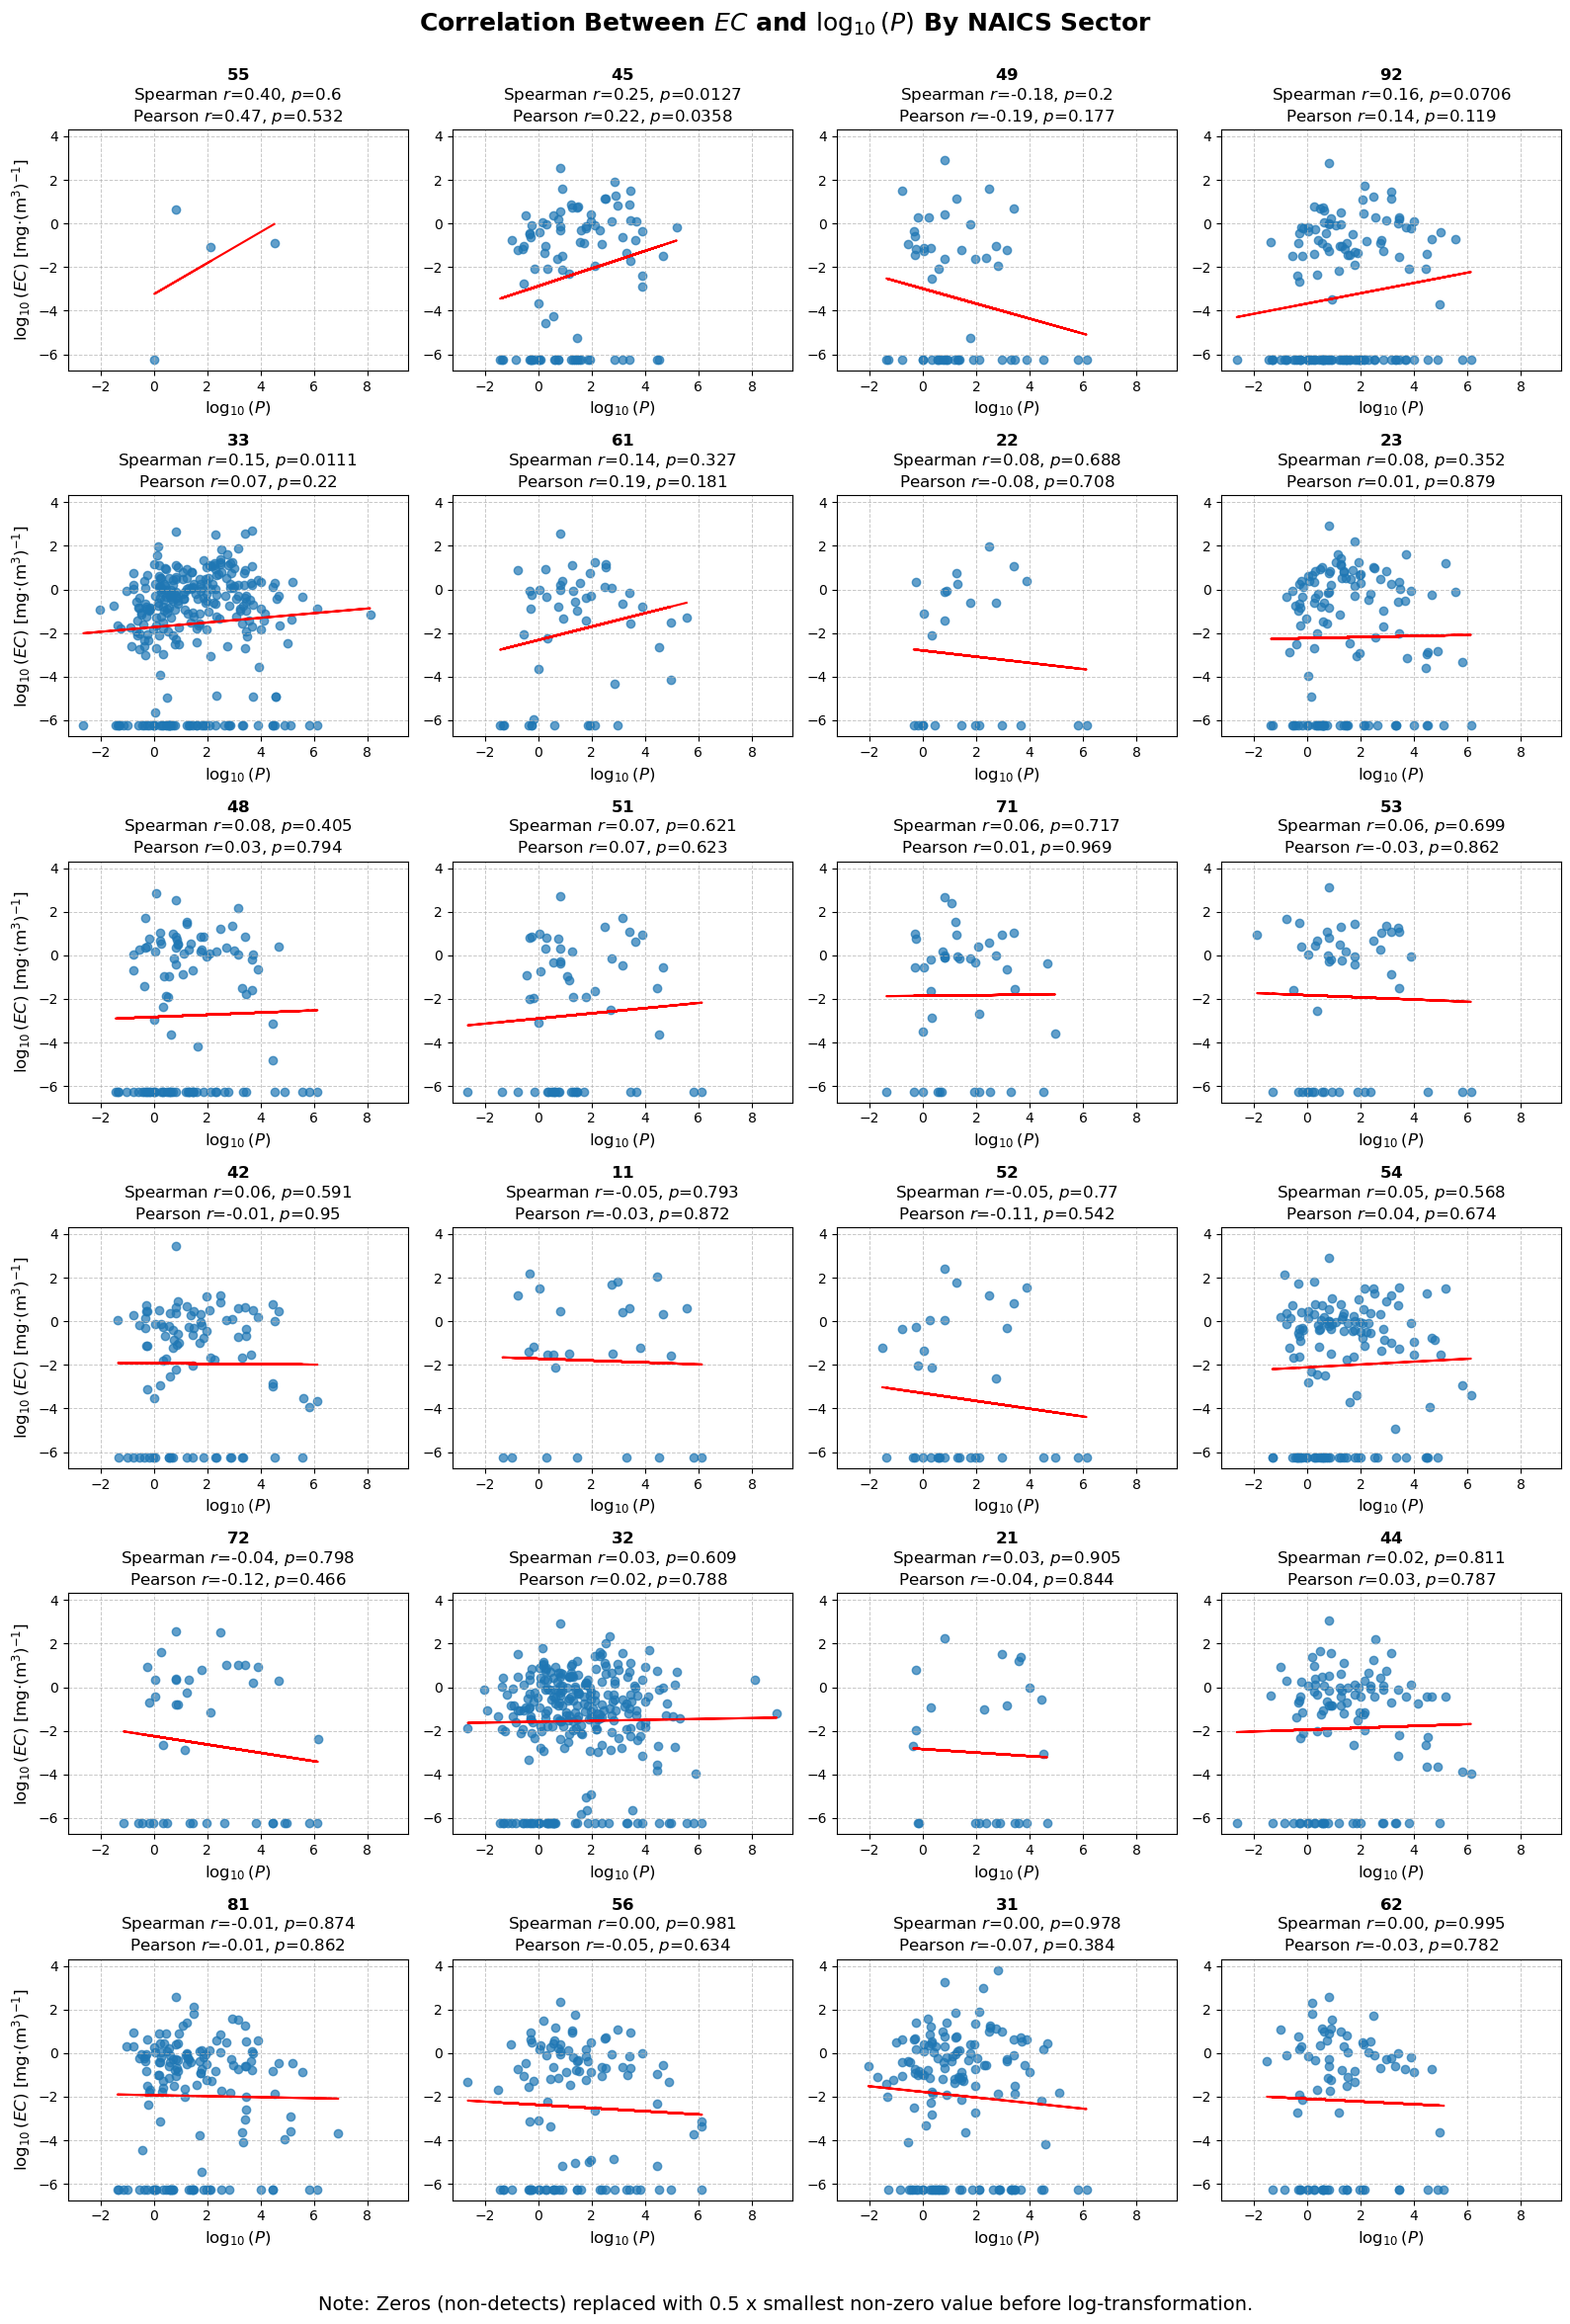

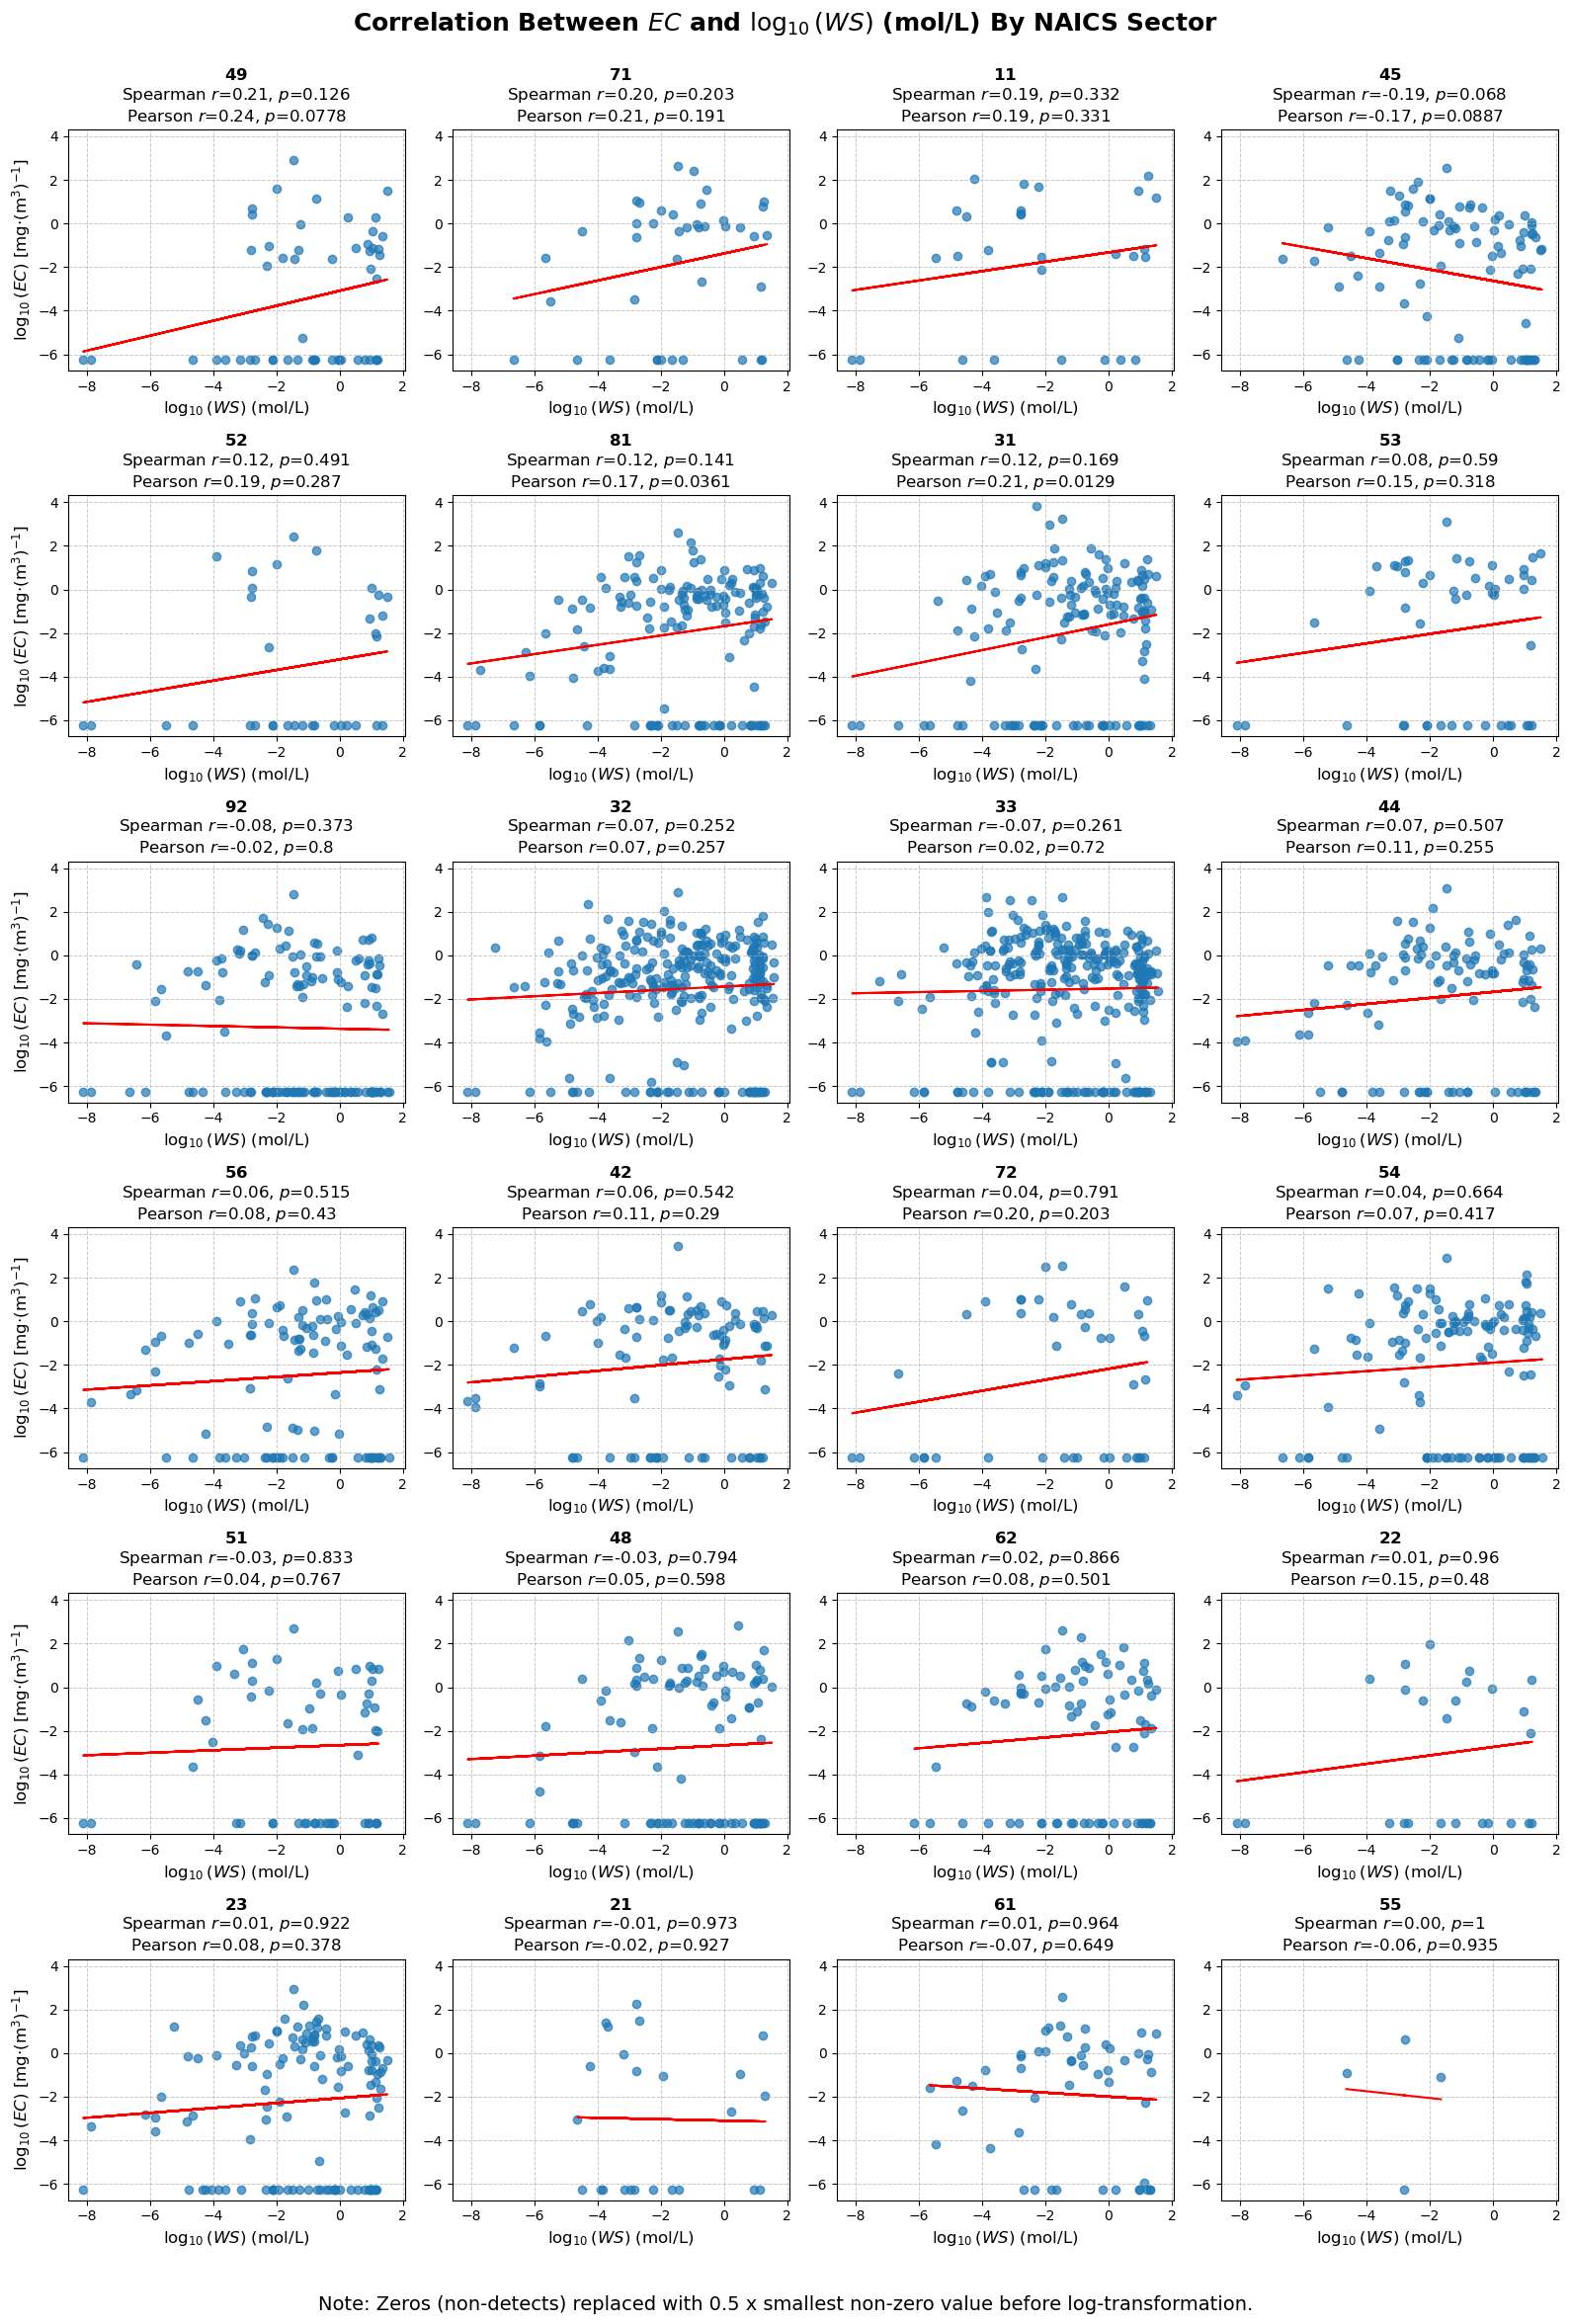

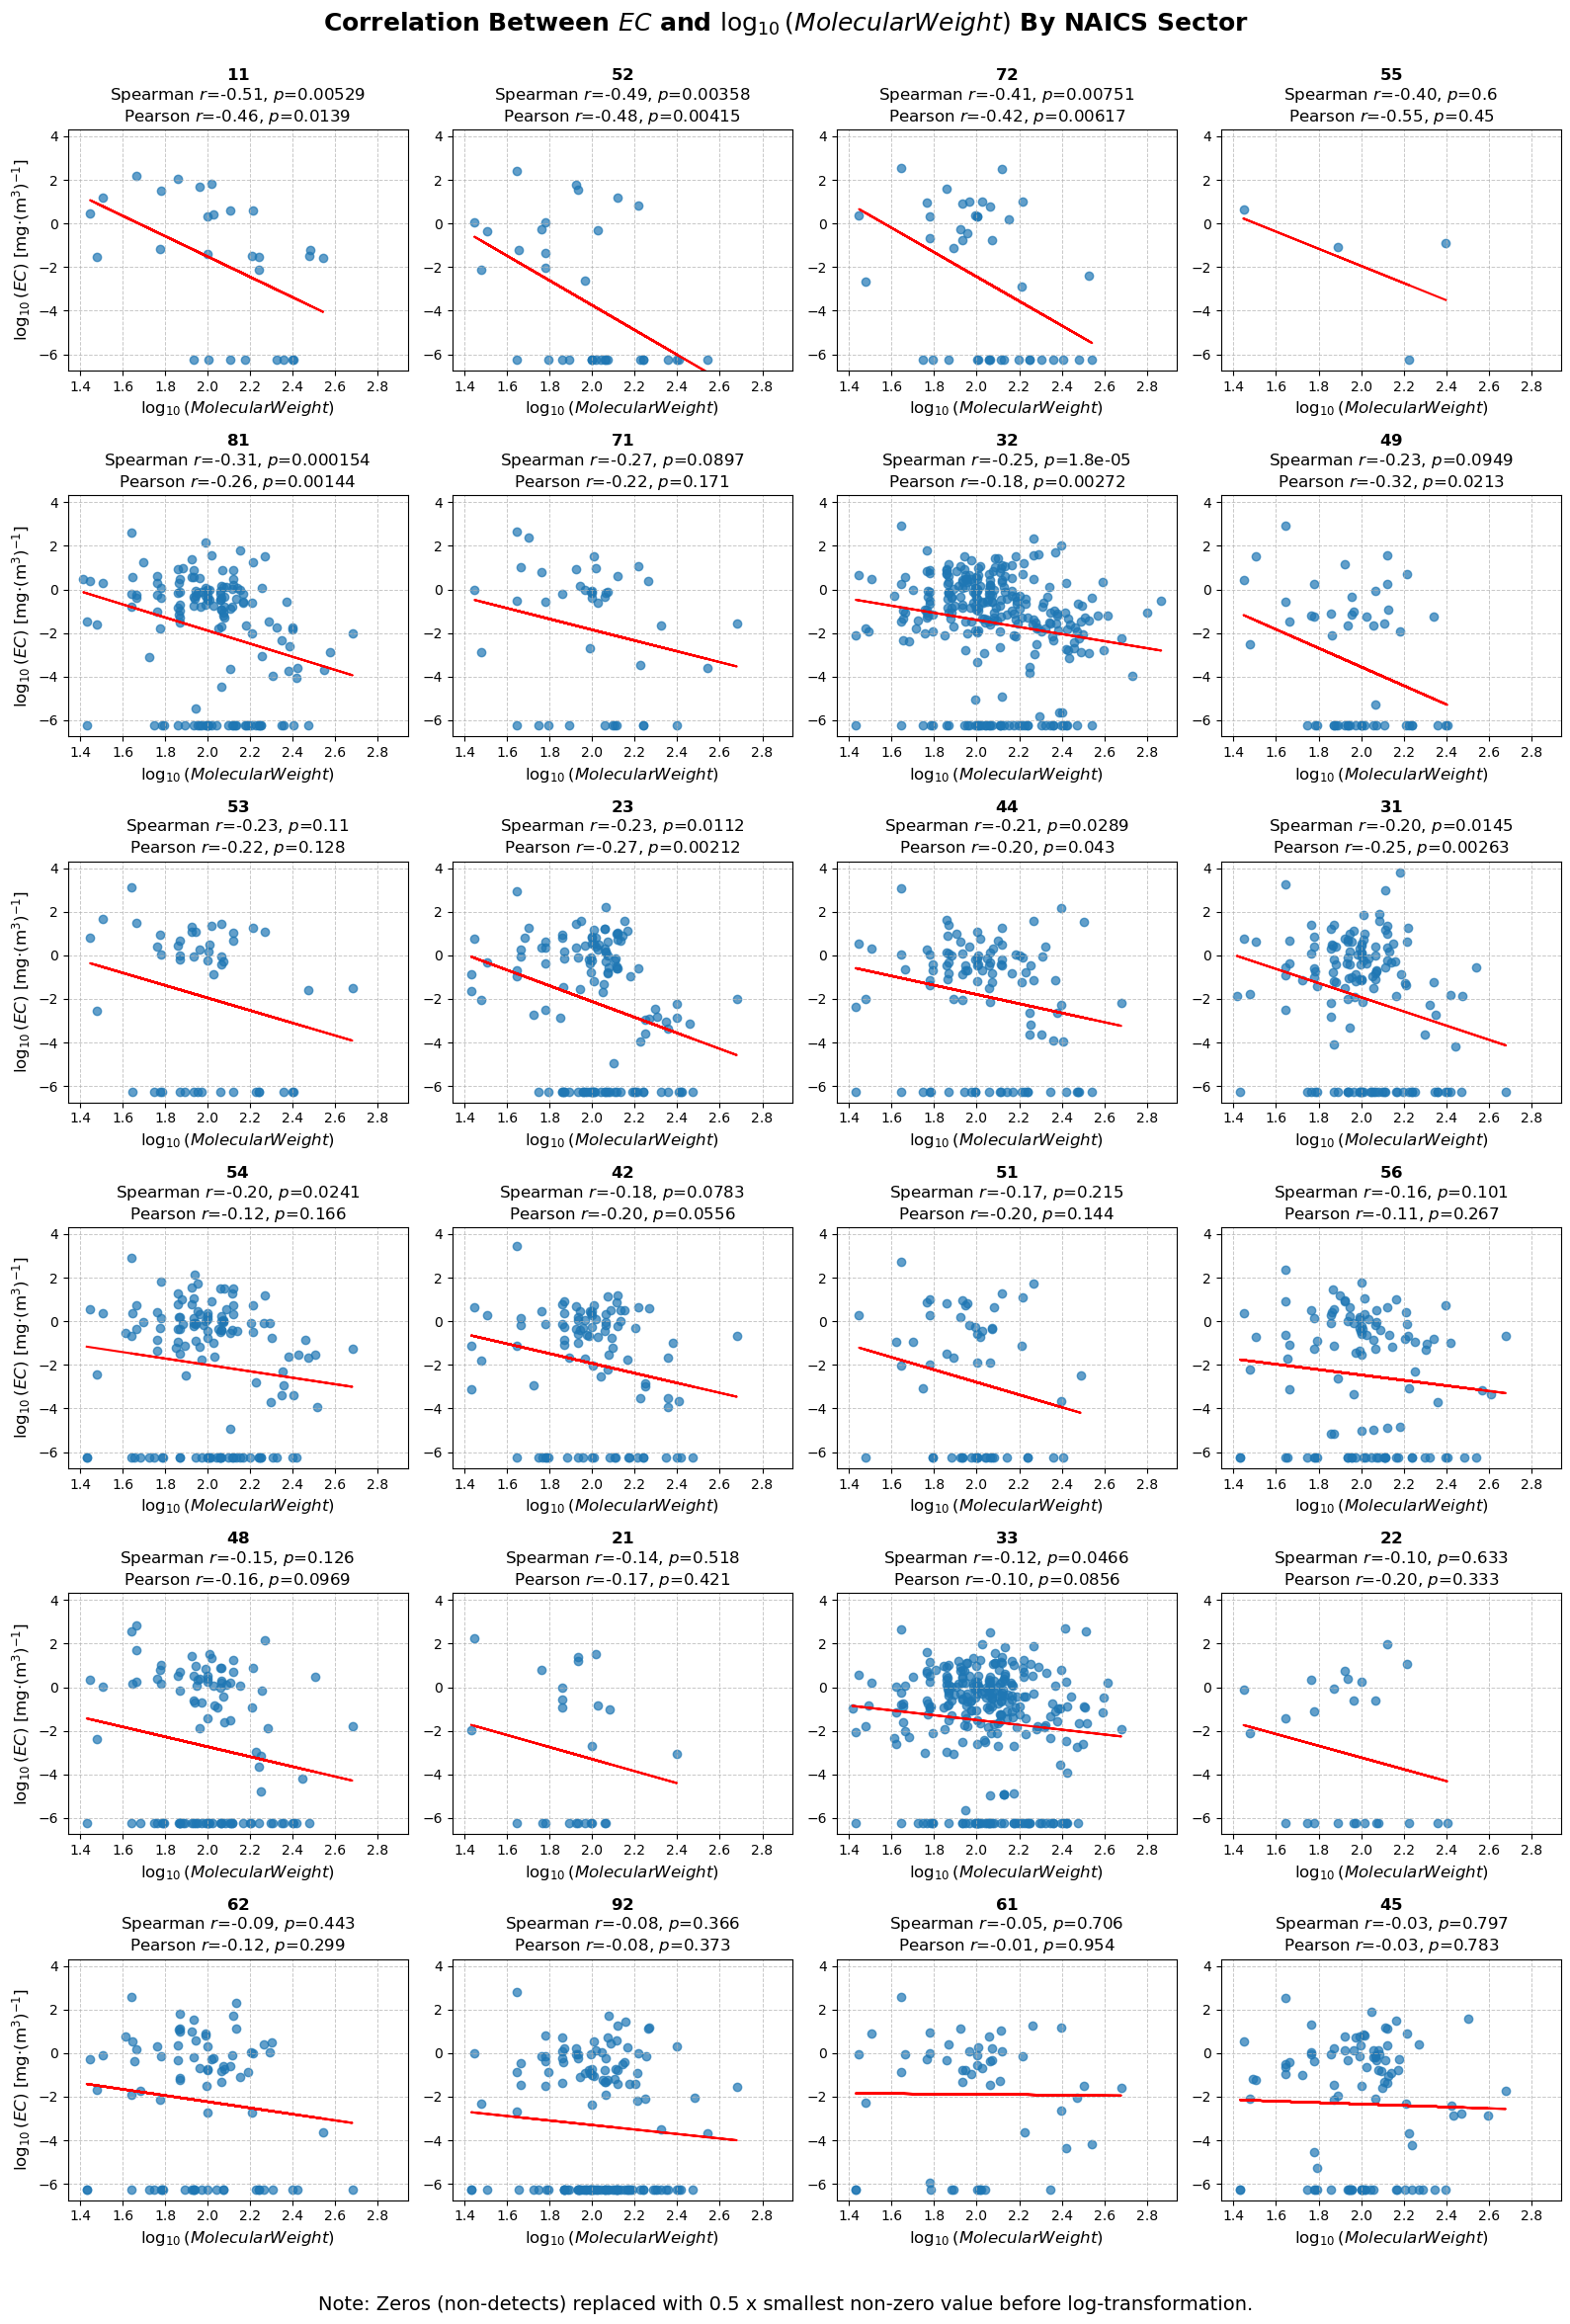

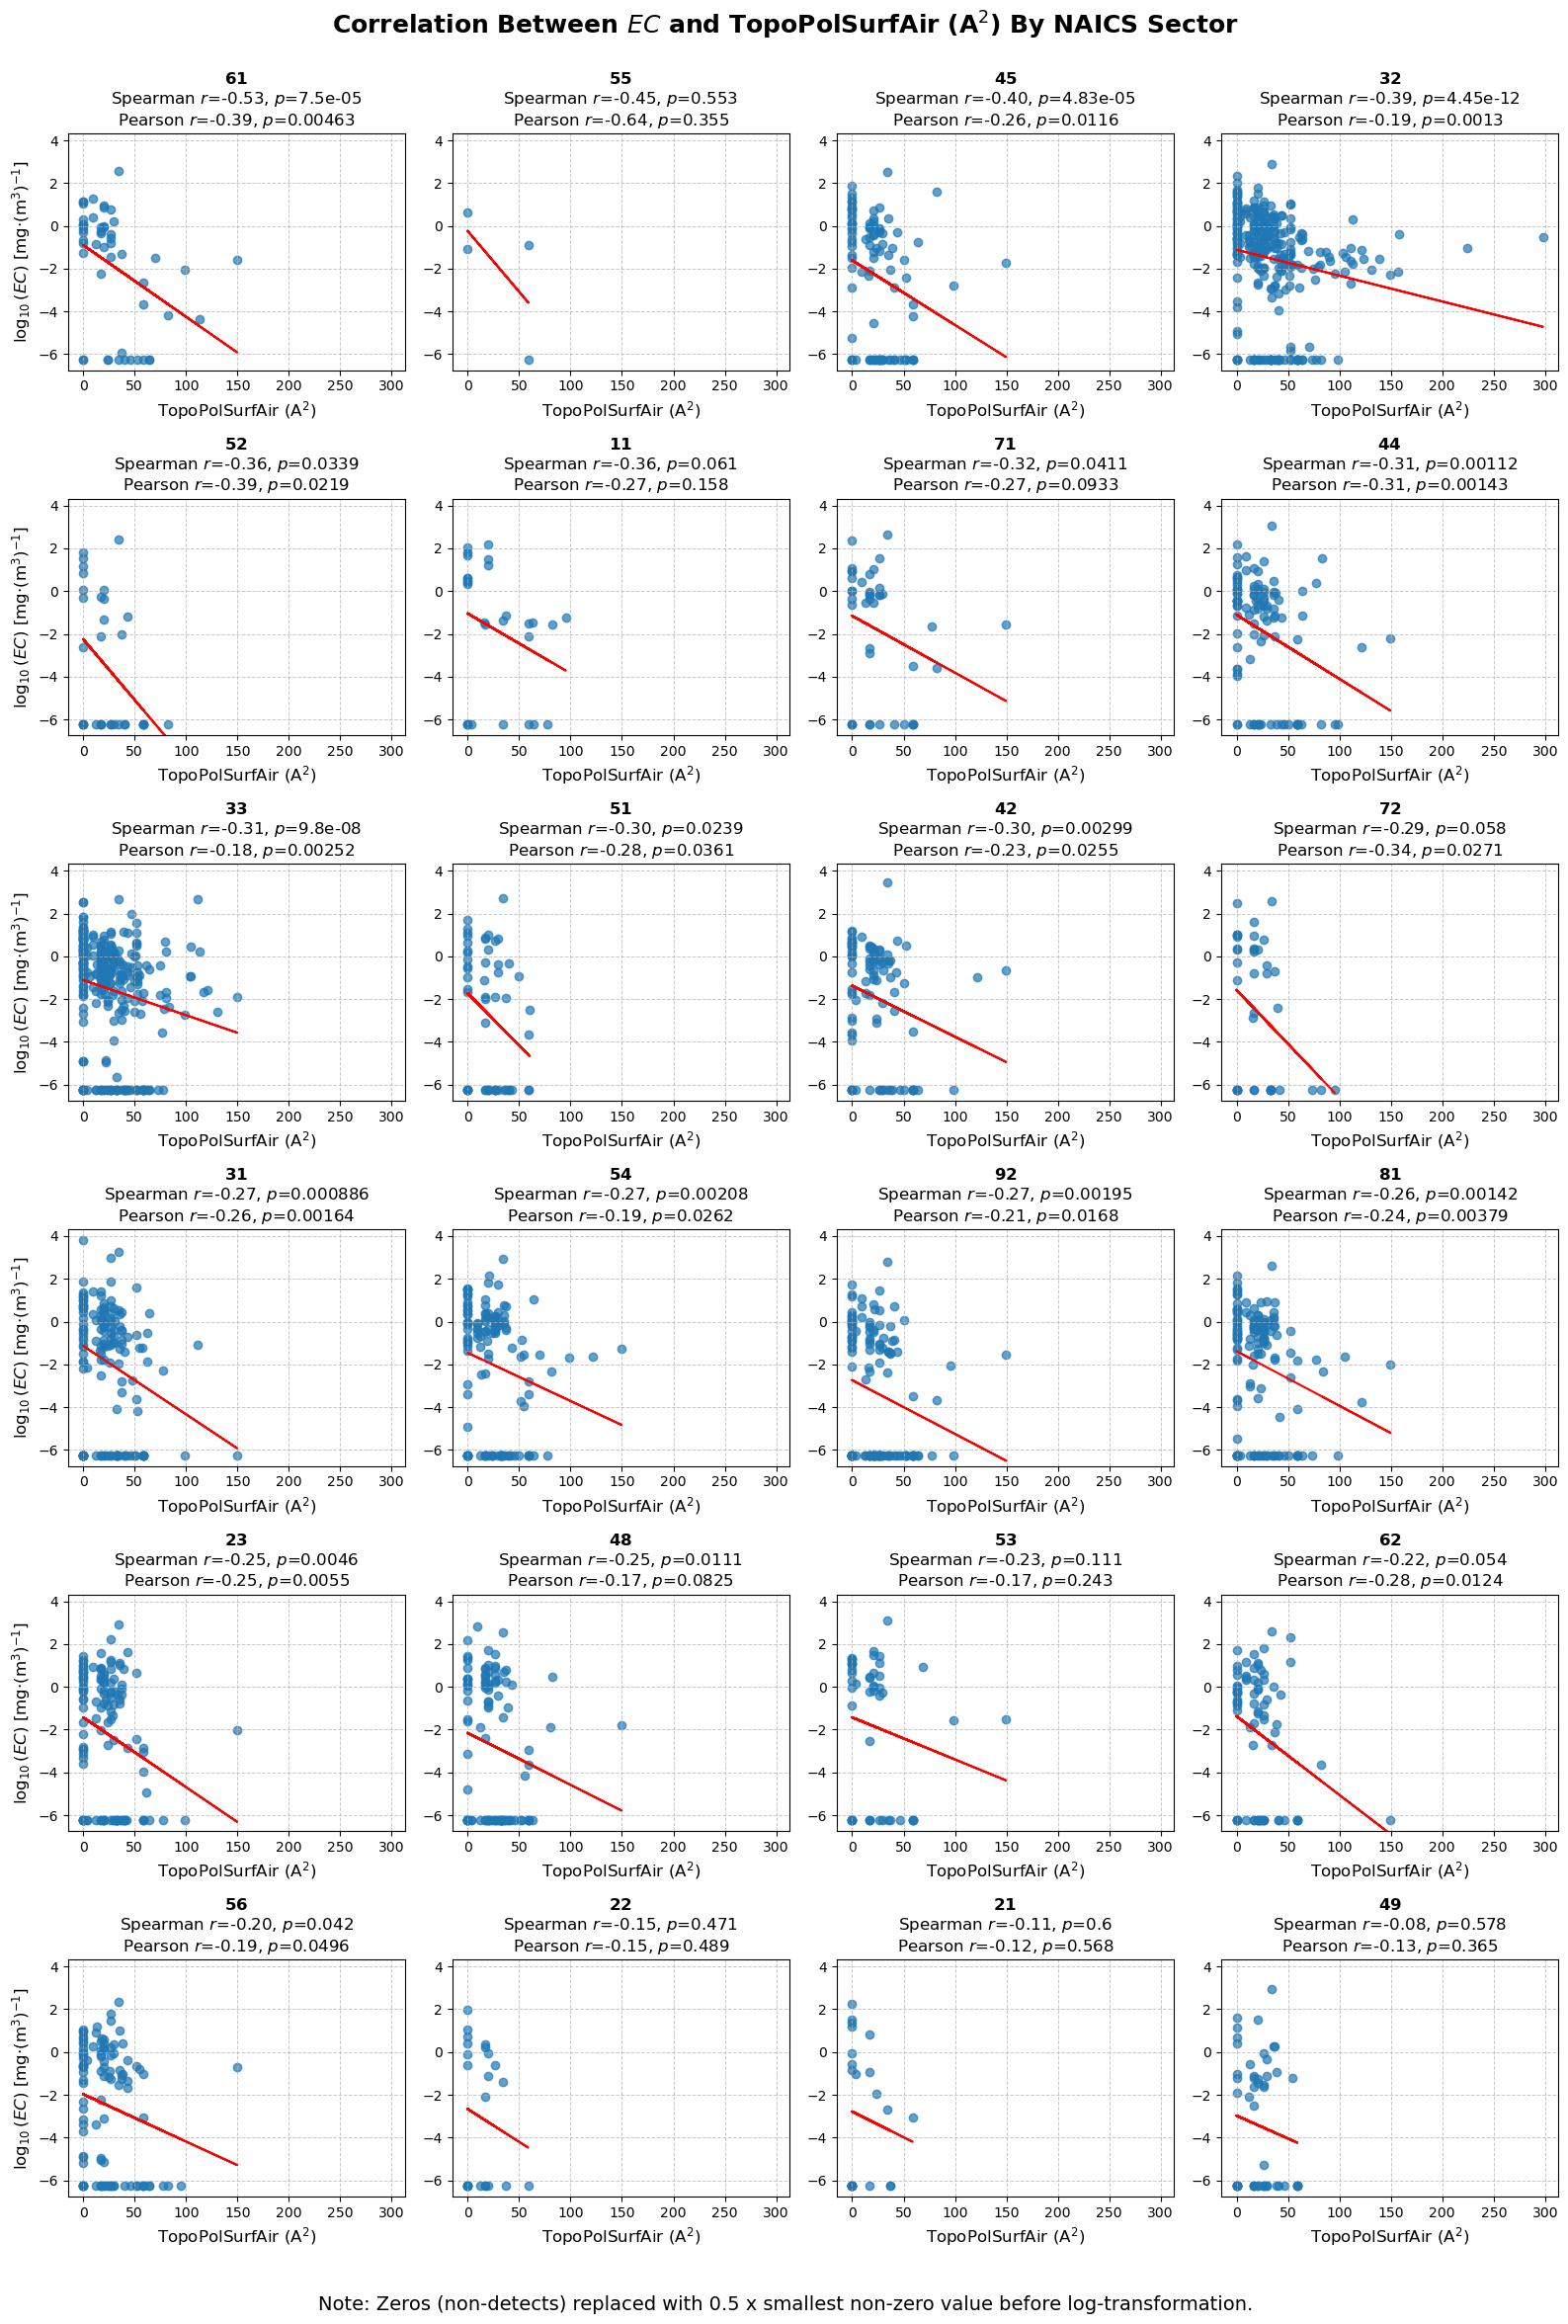

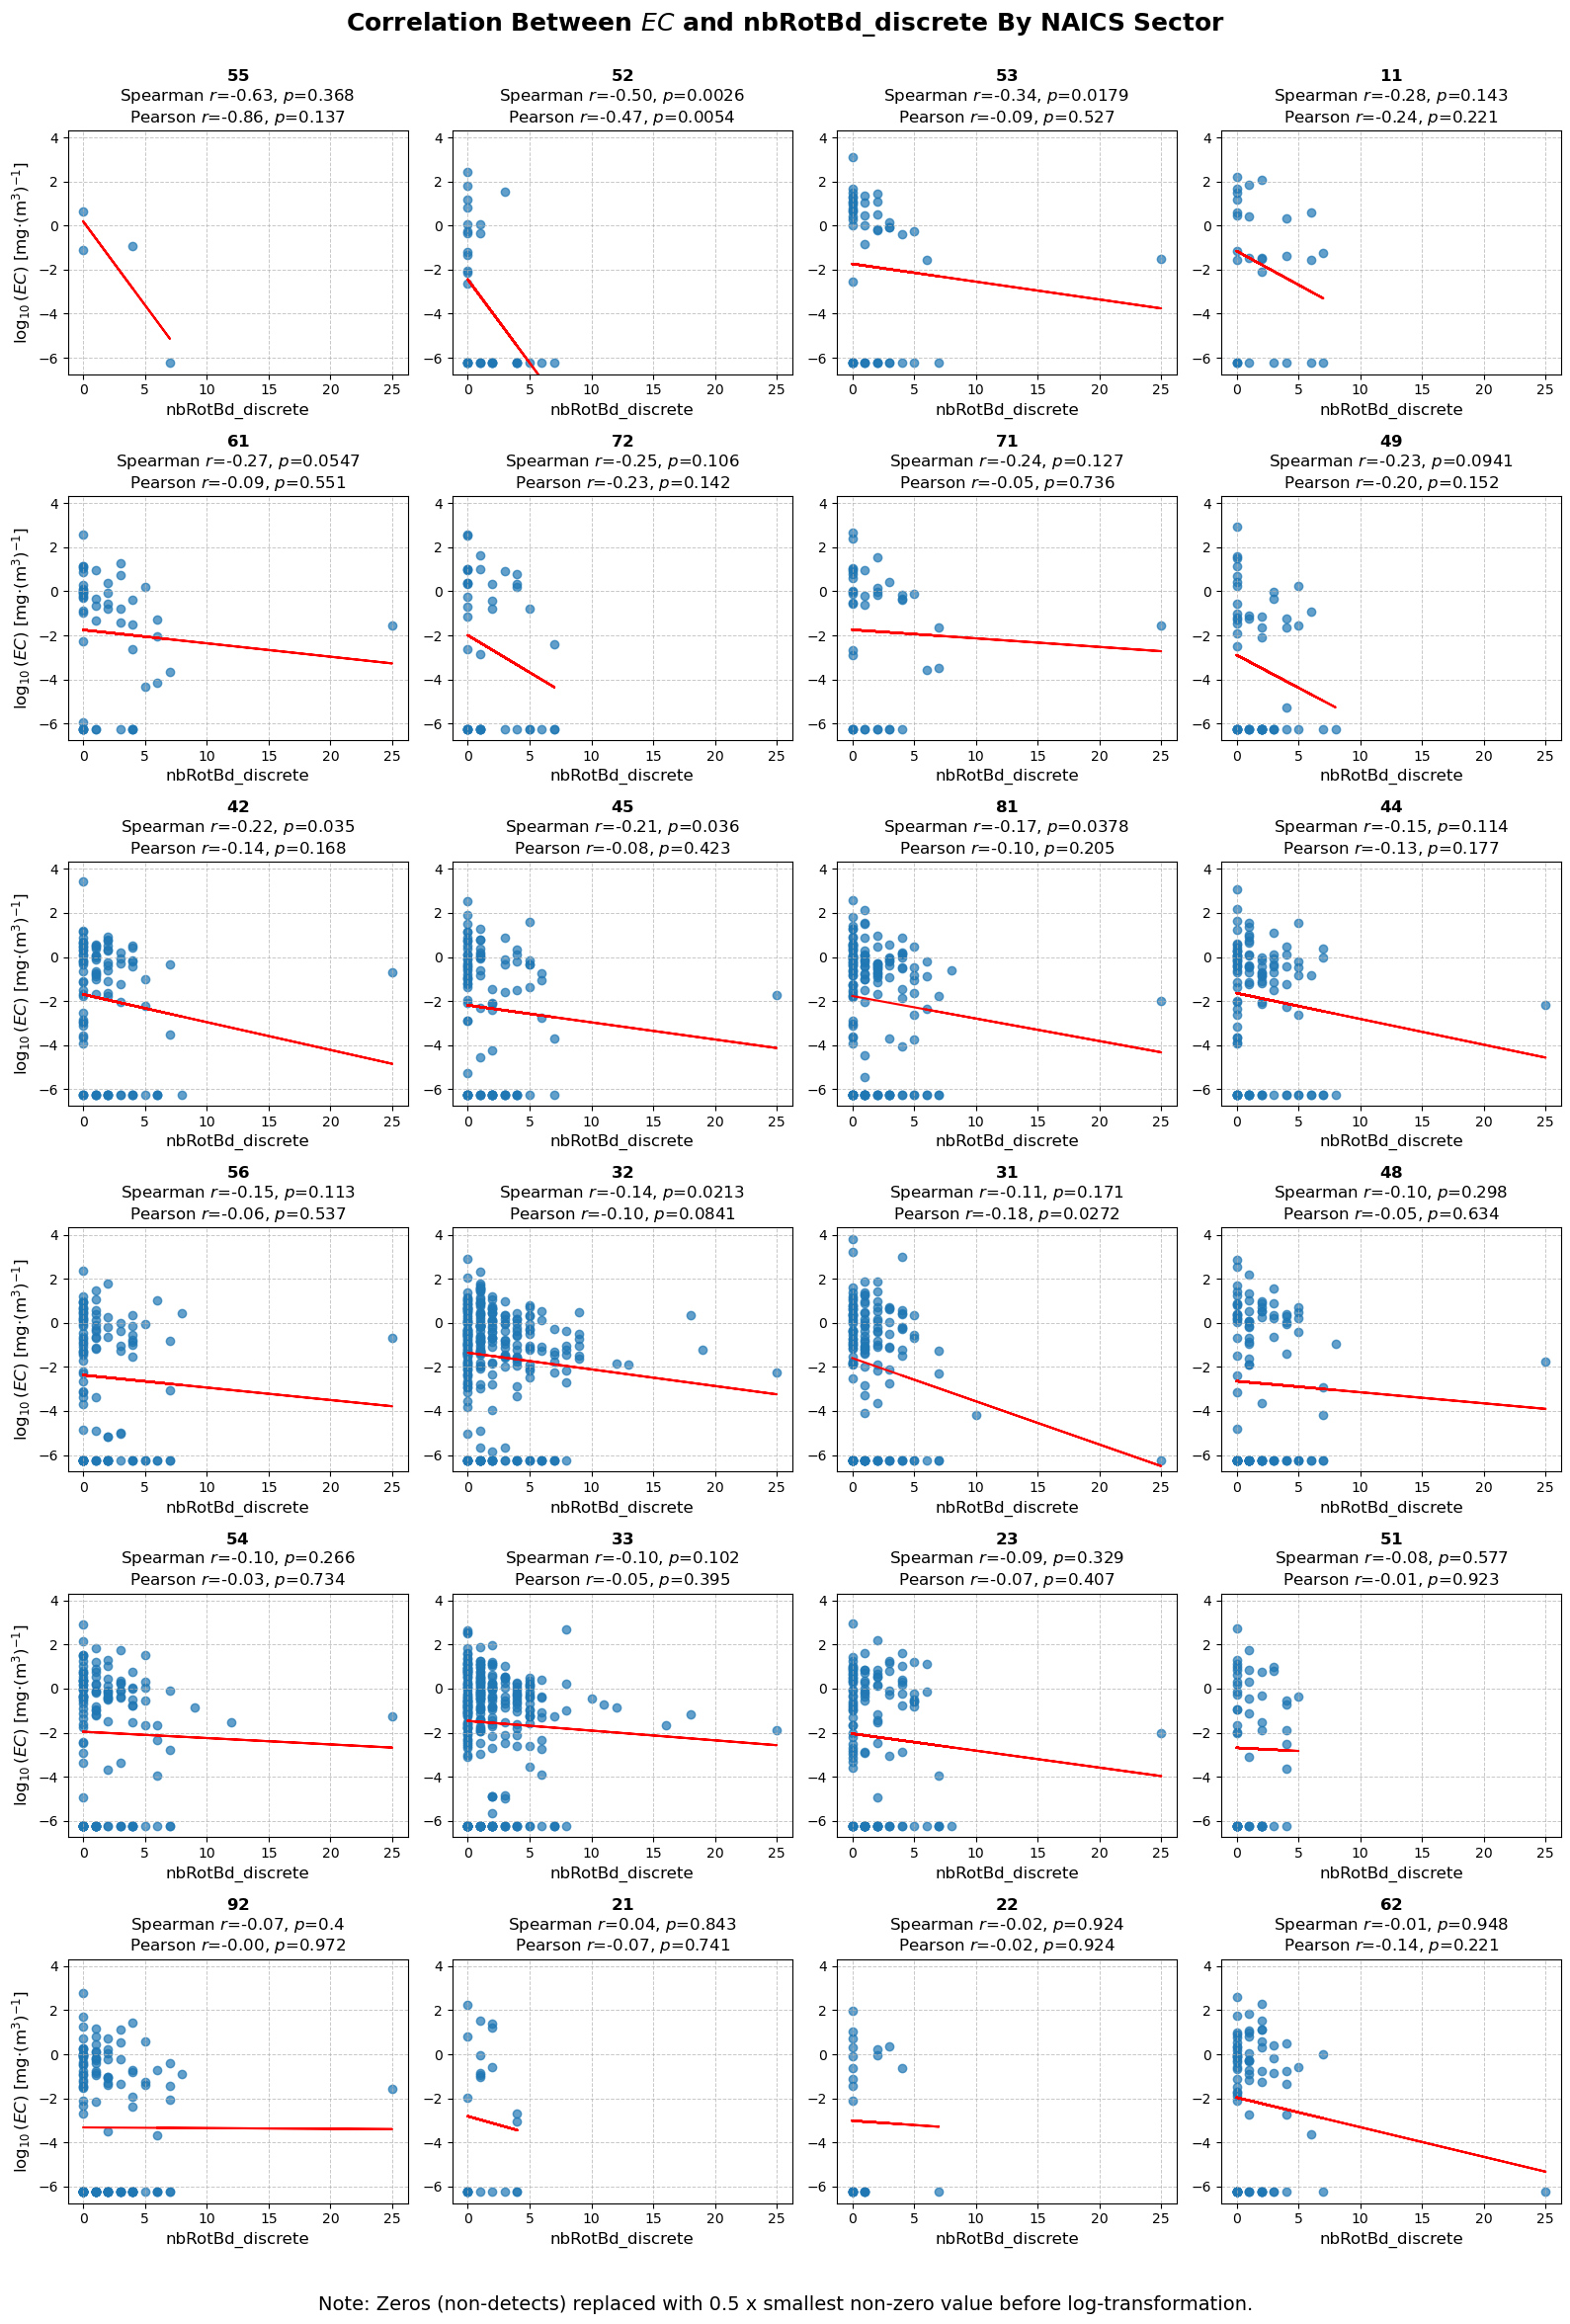

In [4]:
for feature, values in correlation_features.items():
    
    label = label_for_feature[feature]
    suptitle = f'Correlation Between $\\mathit{{EC}}$ and {label} By NAICS Sector'
    write_path = f'figures/correlation_{feature}_by_naics.png'
    
    plot.correlation_by_naics(
        ec_for_naics['sector'],
        values,
        xlabel=label,
        suptitle=suptitle,
        write_path=write_path
    )